In [1]:
#data libraries
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv(r'C:\Users\Vinay\Documents\Refactored_Py_DS_ML_Bootcamp-master\TensorFlow_FILES\DATA\fake_reg.csv')

In [4]:
dataset.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


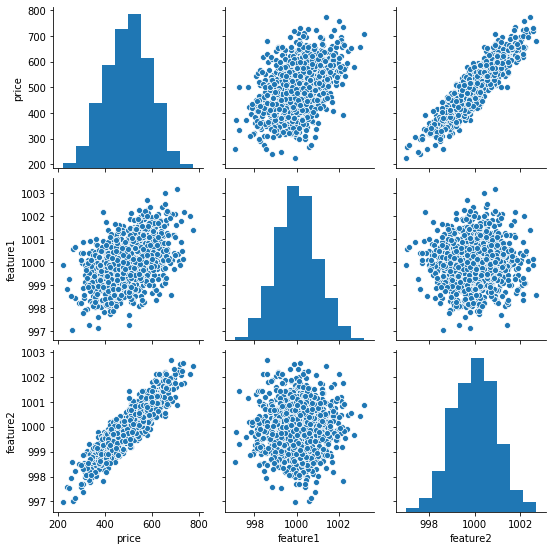

In [5]:
sns.pairplot(dataset)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dataset[['feature1', 'feature2']].values

In [8]:
y =dataset['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_train.max()

1.0

In [18]:
X_test = scaler.fit_transform(X_test)

In [19]:
X_test.max()

1.0

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#help(Sequential)

In [22]:
#help(Dense)

In [23]:
model_1 = Sequential()

model_1.add(Dense(4, activation= 'relu'))
model_1.add(Dense(4, activation= 'relu'))
model_1.add(Dense(4, activation= 'relu'))

model_1.add(Dense(1))

model_1.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
model_1.fit(x = X_train, y = y_train, epochs = 250)

In [133]:
loss_df = pd.DataFrame(model_1.history.history)

In [134]:
loss_df.head()

,loss
0,256541.366607
1,256352.596786
2,256119.909286
3,255833.604107
4,255482.884286


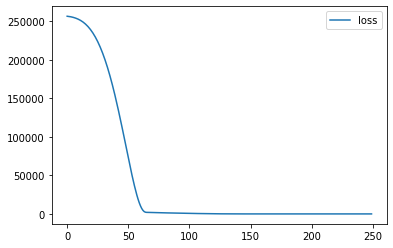

In [135]:
loss_df.plot()

In [138]:
model_1.evaluate(X_test, y_test, verbose  = 0)

58.05616574605306

In [139]:
model_1.evaluate(X_train, y_train, verbose  = 0)

24.315627822875978

In [140]:
pred = model_1.predict(X_test)

In [141]:
test_predictions = pd.Series(pred.reshape(300,))

In [143]:
pred_df = pd.DataFrame(y_test, columns= ['True Value'])

In [144]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [146]:
pred_df.columns = ['True Value', 'Predicted Value']

In [147]:
pred_df

,True Value,Predicted Value
0,402.296319,406.956085
1,624.156198,630.767822
2,582.455066,600.066956
3,578.588606,574.705750
4,371.224104,360.714264
...,...,...
295,525.704657,530.927551
296,502.909473,509.055145
297,612.727910,617.272278
298,417.569725,422.012848


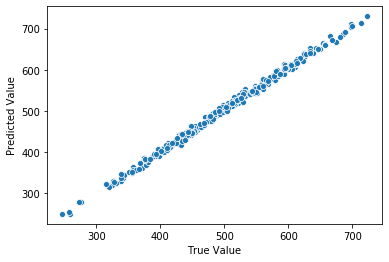

In [148]:
sns.scatterplot(data= pred_df, x = 'True Value', y= 'Predicted Value')

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [150]:
mean_absolute_error(pred_df['True Value'], pred_df['Predicted Value'])

6.203258819442146

In [152]:
mean_squared_error(pred_df['True Value'], pred_df['Predicted Value'])**0.5

7.619459237255063

In [153]:
new_gem = [[998, 1000]]

In [154]:
new_gem = scaler.fit_transform(new_gem)

In [155]:
model_1.predict(new_gem)

array([[119.091194]], dtype=float32)

In [156]:
from tensorflow.keras.models import load_model

In [157]:
model_1.save('first_model.h5')